In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing dataset from google drive. Link of dataset: https://drive.google.com/drive/folders/1EdsCgAvp0U7VlNmHzJyVx0bbRgOfjBz3?usp=sharing

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/MLAssignment3/weatherAUS.csv"
dataset=pd.read_csv(path, on_bad_lines='skip')
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No




---


Dataset description: 
This dataset contains about 10 years of daily weather observations from many locations across Australia.
It predicts if it will rain tomorrow or not. 
This column is Yes if the rain for that day was 1mm or more 
---
*   Date: The date of observation
*   Location: The common name of the location of the weather station
*   MinTemp: The minimum temperature in degrees celsius
*   MaxTemp: The maximum temperature in degrees celsius
*   Rainfall: The amount of rainfall recorded for the day in mm
*  Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am 
*   Sunshine: The number of hours of bright sunshine in the day
*   WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
*   WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

*   WindDir9am: Direction of the wind at 9am
9 AM:
*   RH:	Relative humidity at 9 am	percent
*   Cld:	Fraction of sky obscured by cloud at 9 am	eighths
*   Dirn:	Wind direction averaged over 10 minutes prior to 9 am	compass points
*   Spd:	Wind speed averaged over 10 minutes prior to 9 am	kilometres per hour
*   MSLP:	Atmospheric pressure reduced to mean sea level at 9 am 














Dropping unimportant features and replacing NaN values with mean values of each column.

In [ ]:
dataset.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
dataset.head(5)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


Converting columns that had a string of YES/NO to 0 or 1 YES -> 1 NO ->0

In [ ]:
dataset.RainToday = [1 if each == 'Yes' else 0 for each in dataset.RainToday]
dataset.RainTomorrow = [1 if each == 'Yes' else 0 for each in dataset.RainTomorrow]
dataset.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
141990,17.7,34.2,0.0,8.600000,11.100000,41.0,15.0,24.0,48.0,26.0,1015.3,1010.9,0.000000,2.00000,24.3,32.0,0,0
33899,19.1,25.6,0.0,3.800000,3.000000,37.0,19.0,22.0,86.0,79.0,1018.8,1017.3,7.000000,6.00000,21.5,24.2,0,0
1672,2.6,18.5,3.6,5.468232,7.611178,22.0,9.0,13.0,74.0,43.0,1020.8,1015.5,4.447461,4.50993,10.7,18.2,1,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# input
x = dataset.iloc[:, [0, 16]].values
  
# output
y = dataset.iloc[:, 17].values

Splitting the data into 30% testing and 70% training.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Scaling the data using standardization. 
---
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation


---

Scaling the training dataset



In [ ]:

from math import sqrt
# calculate column means
def column_means(X_train):
	means = [0 for i in range(len(X_train[0]))]
	for i in range(len(X_train[0])):
		col_values = [row[i] for row in X_train]
		means[i] = sum(col_values) / float(len(X_train))
	return means
 
# calculate column standard deviations
def column_stdevs(X_train, means):
	stdevs = [0 for i in range(len(X_train[0]))]
	for i in range(len( X_train[0])):
		variance = [pow(row[i]-means[i], 2) for row in X_train]
		stdevs[i] = sum(variance)
	stdevs = [sqrt(x/(float(len(X_train)-1))) for x in stdevs]
	return stdevs
 
# standardize dataset
def standardize_dataset(X_train, means, stdevs):
	for row in X_train:
		for i in range(len(row)):
			row[i] = (row[i] - means[i]) / stdevs[i]
 
# Standardize dataset

print(X_train)
# Estimate mean and standard deviation
means = column_means(X_train)
stdevs = column_stdevs (X_train, means)
print(means)
print(stdevs)
# standardize dataset
standardize_dataset(X_train, means, stdevs)
print(X_train)

Scaling the testing dataset

In [ ]:
from math import sqrt
# calculate column means
def column_means(X_test):
	means = [0 for i in range(len(X_test))]
	for i in range(len(X_test[0])):
		col_values = [row[i] for row in X_test]
		means[i] = sum(col_values) / float(len(X_test))
	return means
 
# calculate column standard deviations
def column_stdevs(X_test, means):
	stdevs = [0 for i in range(len(X_test[0]))]
	for i in range(len( X_test[0])):
		variance = [pow(row[i]-means[i], 2) for row in X_test]
		stdevs[i] = sum(variance)
	stdevs = [sqrt(x/(float(len(X_test)-1))) for x in stdevs]
	return stdevs
 
# standardize dataset
def standardize_dataset(X_test, means, stdevs):
	for row in X_test:
		for i in range(len(row)):
			row[i] = (row[i] - means[i]) / stdevs[i]
 
# Standardize dataset

print(X_test)
# Estimate mean and standard deviation
means = column_means(X_test)
stdevs = column_stdevs (X_test, means)
print(means)
print(stdevs)
# standardize dataset
standardize_dataset(X_test, means, stdevs)
print(X_test)

Implementing Logistic Regression and some performance metrics.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
def main() :


      
    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
      
    model.fit( X_train, y_train )    
       
    
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
   
      
    # measure performance    
    correctly_classified = 0    
    
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
           
          
      
              
        count = count + 1
          
    print( "Accuracy :  ", ( 
      correctly_classified / count ) * 100 )
    #Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, Y_pred)
  
    print ("Confusion Matrix : \n", cm)
    #Precision
    from sklearn.metrics import precision_score
    print("Precision: ",precision_score(y_test, Y_pred, average='macro'))
    #Recall
    from sklearn.metrics import recall_score
    print("Recall: ",recall_score(y_test, Y_pred, average='macro'))
 

        

  
  
if __name__ == "__main__" :     
    main()
   

Accuracy :   78.48664008433018
Confusion Matrix : 
 [[33596   502]
 [ 8886   654]]
Precision:  0.67828650082453
Recall:  0.5269155940092762


 Logistic Regression from scratch compared to using sklearn 
 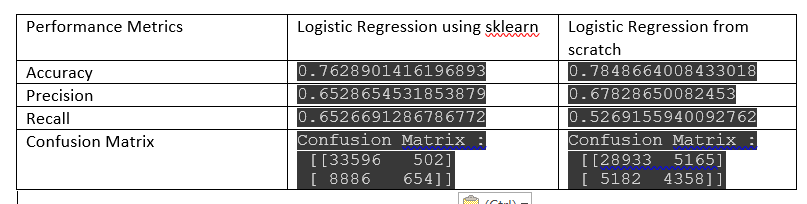

From the table above you can tell that the result of the performance metrics are close but the scratch version is slightly better when it comes to accracy and precision. 
Recall value is higher for the sklearn one.
Confusion matrices are also different, the sklearn version predicted more correctly than the scratch version. 